In [ ]:
#https://www.analyticsvidhya.com/blog/2018/06/unsupervised-deep-learning-computer-vision/

In [1]:
from keras.datasets import fashion_mnist

Using TensorFlow backend.
/Users/ritesh.ratti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ritesh.ratti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ritesh.ratti/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/ritesh.ratti/anaconda3/lib/p

In [33]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec
from keras.models import Sequential
from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

In [4]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 41s 9us/step


In [5]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

# AUTOENCODER

In [11]:
# this is our input placeholder
input_img = Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = Dense(2000, activation='relu')(input_img)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(500, activation='relu')(encoded)
encoded = Dense(10, activation='sigmoid')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(500, activation='relu')(encoded)
decoded = Dense(500, activation='relu')(decoded)
decoded = Dense(2000, activation='relu')(decoded)
decoded = Dense(784)(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [12]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [13]:
autoencoder.compile(optimizer='adam', loss='mse')

In [14]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [15]:
train_history = autoencoder.fit(train_x, train_x, epochs=500, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])



Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 8s 136us/step - loss: 0.0912 - val_loss: 0.0690
Epoch 2/500
60000/60000 [==============================] - 8s 128us/step - loss: 0.0606 - val_loss: 0.0493
Epoch 3/500
60000/60000 [==============================] - 8s 126us/step - loss: 0.0429 - val_loss: 0.0384
Epoch 4/500
60000/60000 [==============================] - 8s 126us/step - loss: 0.0384 - val_loss: 0.0348
Epoch 5/500
60000/60000 [==============================] - 8s 131us/step - loss: 0.0329 - val_loss: 0.0307
Epoch 6/500
60000/60000 [==============================] - 9s 145us/step - loss: 0.0295 - val_loss: 0.0280
Epoch 7/500
60000/60000 [==============================] - 9s 142us/step - loss: 0.0268 - val_loss: 0.0257
Epoch 8/500
60000/60000 [==============================] - 9s 146us/step - loss: 0.0248 - val_loss: 0.0240
Epoch 9/500
60000/60000 [==============================] - 9s 145us/step - loss: 0.0238 - va

KeyboardInterrupt: 

In [16]:
pred = autoencoder.predict(val_x)

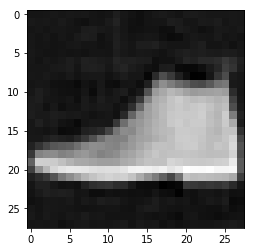

In [20]:
import matplotlib.pyplot as plt
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

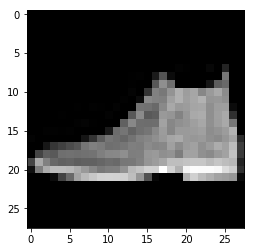

In [21]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')

In [39]:
#. ENCODE IMAGE using AUTOENCODER

In [36]:
# Extract layers 
def extract_layers(main_model, starting_layer_ix, ending_layer_ix):
  # create an empty model
    new_model = Sequential()
    for ix in range(starting_layer_ix, ending_layer_ix + 1):
        curr_layer = main_model.get_layer(index=ix)
        # copy this layer over to the new model
        new_model.add(curr_layer)
    return new_model


In [29]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               2505

In [37]:
model1 = extract_layers(autoencoder, 0 , 4)

In [38]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 2,826,010
Trainable params: 2,826,010
Non-trainable params: 0
_________________________________________________________________


In [40]:
encoding1 = model1.predict(val_x)

In [42]:
encoding1[0]

array([0.20656303, 0.5694029 , 0.82862675, 0.36750895, 0.3586441 ,
       0.3731063 , 0.2785989 , 0.5573358 , 0.5689776 , 0.2379938 ],
      dtype=float32)

# DENOISING AUTOENCODER (Image Denoising)

In [43]:
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input, Conv2D, MaxPool2D, UpSampling2D
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

In [45]:
!pip install imgaug

     |████████████████████████████████| 948 kB 150 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 99 kB/s eta 0:00:013
     |████████████████████████████████| 12.1 MB 449 kB/s eta 0:00:01
     |████████████████████████████████| 138 kB 151 kB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 417 kB/s eta 0:00:01
ERROR: autokeras 0.3.7 has requirement keras==2.2.4, but you'll have keras 2.2.5 which is incompatible.
ERROR: autokeras 0.3.7 has requirement numpy==1.15.4, but you'll have numpy 1.17.3 which is incompatible.
ERROR: autokeras 0.3.7 has requirement pandas==0.23.4, but you'll have pandas 0.25.3 which is incompatible.
ERROR: autokeras 0.3.7 has requirement requests==2.21.0, but you'll have requests 2.22.0 which is incompatible.
ERROR: autokeras 0.3.7 has requirement scikit-image==0.14.2, but you'll have scikit-image 0.17.2 which is incompatible.
ERROR: autokeras 0.3.7 has requirement scikit-learn==0.20.2, but you'll have scikit-learn 0.21.1 which is inc

In [46]:
from imgaug import augmenters as iaa
seq = iaa.Sequential([iaa.SaltAndPepper(0.2)])

train_x_aug = seq.augment_images(train_x)
val_x_aug = seq.augment_images(val_x)

In [47]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)

train_x_aug = train_x_aug/255.
val_x_aug = val_x_aug/255.

train_x_aug = train_x_aug.reshape(-1, 28, 28, 1)
val_x_aug = val_x_aug.reshape(-1, 28, 28, 1)